## Introduction

We will be using the iris data set for this tutorial. This is a well-known data set containing iris species and sepal and petal measurements. The data we will use are in a file called `iris_data.csv` found in the [data](data/) directory.

In [77]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme();

## Question 1

Load the data from the file using the techniques learned today. Examine it.

Determine the following:

* The number of data points (rows). (*Hint:* check out the dataframe `.shape` attribute.)
* The column names. (*Hint:* check out the dataframe `.columns` attribute.)
* The data types for each column. (*Hint:* check out the dataframe `.dtypes` attribute.)

In [6]:
filename = 'data/iris_data.csv'
iris = pd.read_csv(filename)

(150, 5)

In [8]:
iris.shape, iris.columns, iris.dtypes

((150, 5),
 Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
        'species'],
       dtype='object'),
 sepal_length    float64
 sepal_width     float64
 petal_length    float64
 petal_width     float64
 species          object
 dtype: object)

In [5]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [9]:
iris.species.value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

## Question 2

Examine the species names and note that they all begin with 'Iris-'. Remove this portion of the name so the species name is shorter. 

*Hint:* there are multiple ways to do this, but you could use either the [string processing methods](http://pandas.pydata.org/pandas-docs/stable/text.html) or the [apply method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.apply.html).

In [11]:
iris.species.value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

### DEBUGGING

In [81]:
iris_copy = iris.copy()

In [82]:
iris_copy.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [83]:
# Add 'Iris-' to the species name
iris_copy['species'] = 'Iris-' + iris_copy['species']

In [84]:
iris_copy.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [85]:
# Remove the 'Iris-' from the species name
iris_copy['species'] = iris_copy['species'].str.replace('Iris-', '')

In [86]:
iris_copy.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Question 3

Determine the following:  
* The number of each species present. (*Hint:* check out the series `.value_counts` method.)
* The mean, median, and quantiles and ranges (max-min) for each petal and sepal measurement.

*Hint:* for the last question, the `.describe` method does have median, but it's not called median. It's the *50%* quantile. `.describe` does not have range though, and in order to get the range, you will need to create a new entry in the `.describe` table, which is `max - min`.

In [24]:
iris.describe().round(2)

,sepal_length,sepal_width,petal_length,petal_width
count,150.00,150.00,150.00,150.00
mean,5.84,3.05,3.76,1.20
std,0.83,0.43,1.76,0.76
min,4.30,2.00,1.00,0.10
25%,5.10,2.80,1.60,0.30
50%,5.80,3.00,4.35,1.30
75%,6.40,3.30,5.10,1.80
max,7.90,4.40,6.90,2.50


In [25]:
iris.sepal_length.mean().round(2).item(), iris.sepal_length.std().round(2).item()

(5.84, 0.83)

In [26]:
iris.sepal_length.min().round(2).item(), iris.sepal_length.max().round(2).item()

(4.3, 7.9)

In [27]:
iris.sepal_length.quantile([0.25, 0.5, 0.75])

0.25    5.1
0.50    5.8
0.75    6.4
Name: sepal_length, dtype: float64

In [28]:
# Compute these quantiles manually
iris_sl_sorted = iris.sepal_length.sort_values()
n = len(iris_sl_sorted)
q1 = iris_sl_sorted.iloc[n // 4]
q2 = iris_sl_sorted.iloc[n // 2]
q3 = iris_sl_sorted.iloc[3 * n // 4]
print(f'q1: {q1}, q2: {q2}, q3: {q3}')

q1: 5.1, q2: 5.8, q3: 6.4


In [29]:
stats = iris.describe()

In [32]:
# Rename 50% to median
stats.rename(index={'50%': 'median'}, inplace=True)
stats

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
median,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [33]:
# Add a row for the range = max - min
stats.loc['range'] = stats.loc['max'] - stats.loc['min']

In [35]:
stats.round(2)

,sepal_length,sepal_width,petal_length,petal_width
count,150.00,150.00,150.00,150.00
mean,5.84,3.05,3.76,1.20
std,0.83,0.43,1.76,0.76
min,4.30,2.00,1.00,0.10
25%,5.10,2.80,1.60,0.30
median,5.80,3.00,4.35,1.30
75%,6.40,3.30,5.10,1.80
max,7.90,4.40,6.90,2.50
range,3.60,2.40,5.90,2.40


## Question 4

Calculate the following **for each species** in a separate dataframe:

* The mean of each measurement (sepal_length, sepal_width, petal_length, and petal_width).
* The median of each of these measurements.

*Hint:* you may want to use Pandas [`groupby` method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html) to group by species before calculating the statistic.

If you finish both of these, try calculating both statistics (mean and median) in a single table (i.e. with a single groupby call). See the section of the Pandas documentation on [applying multiple functions at once](http://pandas.pydata.org/pandas-docs/stable/groupby.html#applying-multiple-functions-at-once) for a hint.

In [90]:
# Compute the mean of each column for each species
iris.groupby('species').mean().round(2)

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.01,3.42,1.46,0.24
versicolor,5.94,2.77,4.26,1.33
virginica,6.59,2.97,5.55,2.03


In [91]:
# Compute the median of each column for each species
iris.groupby('species').median().round(2)

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.0,3.4,1.50,0.2
versicolor,5.9,2.8,4.35,1.3
virginica,6.5,3.0,5.55,2.0


In [92]:
iris.groupby('species').agg(['mean', 'median']).round(2)

sepal_length        sepal_width        petal_length         \
                   mean median        mean median         mean median   
species                                                                 
setosa             5.01    5.0        3.42    3.4         1.46   1.50   
versicolor         5.94    5.9        2.77    2.8         4.26   4.35   
virginica          6.59    6.5        2.97    3.0         5.55   5.55   

           petal_width         
                  mean median  
species                        
setosa            0.24    0.2  
versicolor        1.33    1.3  
virginica         2.03    2.0

## Question 5

Make a scatter plot of `sepal_length` vs `sepal_width` using Matplotlib. Label the axes and give the plot a title.

In [55]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

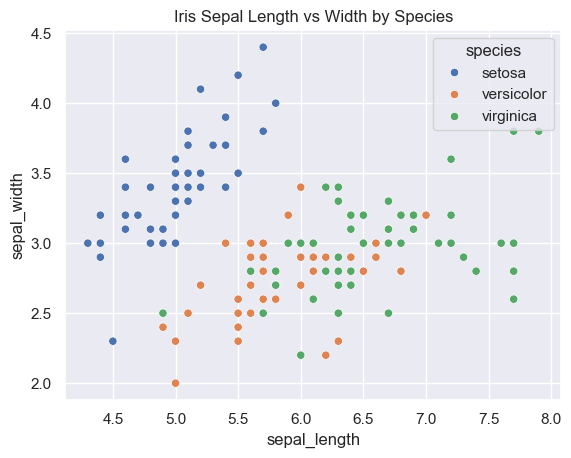

In [54]:
# Plot a scatter plot of sepal_length vs sepal_width using seaborn
sns.scatterplot(data=iris, x='sepal_length', y='sepal_width', hue='species');
plt.title('Iris Sepal Length vs Width by Species');


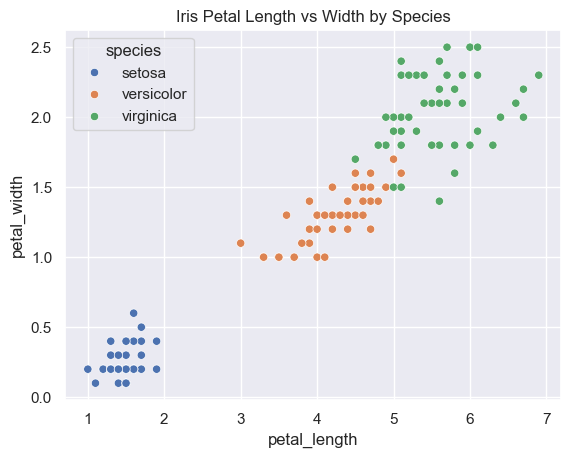

In [56]:
# Plot a scatter plot of petal_length vs petal_width using seaborn
sns.scatterplot(data=iris, x='petal_length', y='petal_width', hue='species');
plt.title('Iris Petal Length vs Width by Species');

## Question 6

Make a histogram of any one of the four features. Label axes and title it as appropriate. 

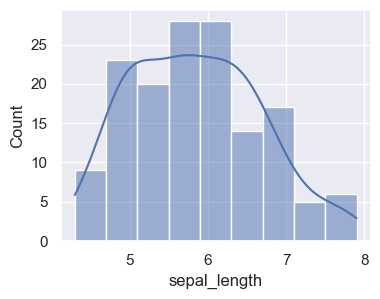

In [59]:
# Plot a histogram of sepal_length
plt.figure(figsize=(4, 3))
sns.histplot(data=iris, x='sepal_length', kde=True);

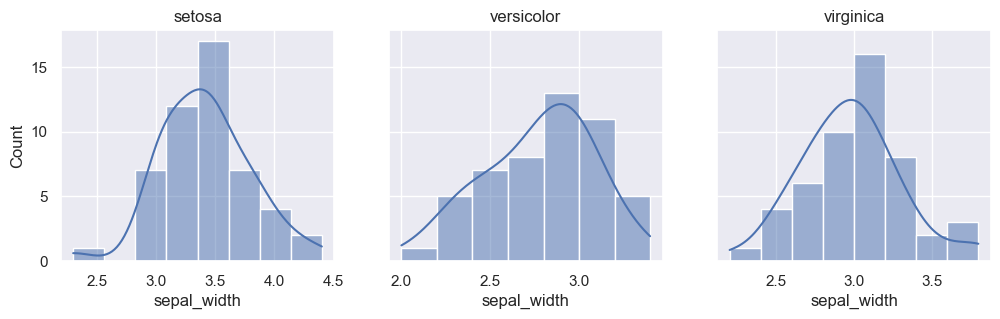

In [61]:
# Plot a histogram of sepal_width separately for each species, make 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(12, 3), sharey=True)
for i, species in enumerate(iris.species.unique()):
    sns.histplot(data=iris[iris.species == species], x='sepal_width', kde=True, ax=axes[i]);
    axes[i].set_title(species);

## Question 7

Now create a single plot with histograms for each feature (`petal_width`, `petal_length`, `sepal_width`, `sepal_length`) overlayed. If you have time, next try to create four individual histogram plots in a single figure, where each plot contains one feature.

For some hints on how to do this with Pandas plotting methods, check out the [visualization guide](http://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html) for Pandas.

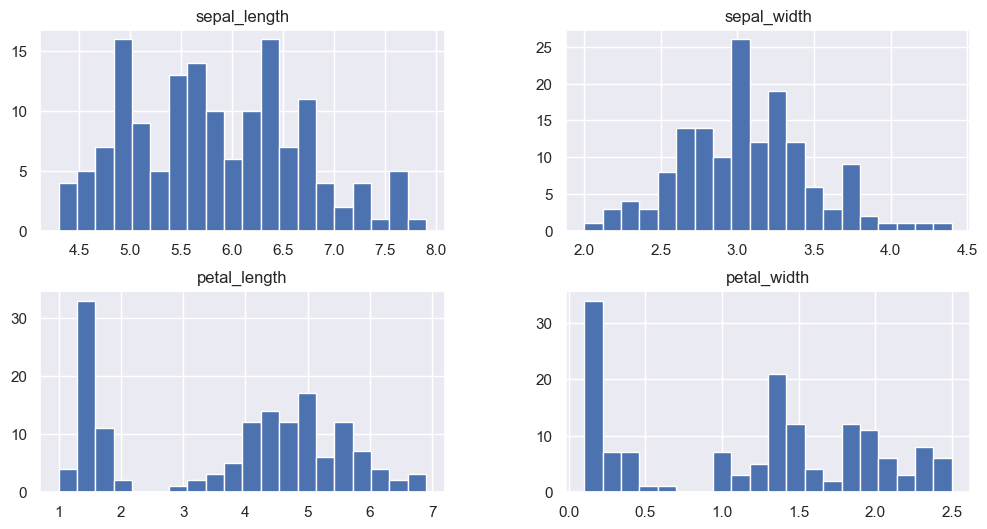

In [93]:
iris.hist(figsize=(12, 6), bins=20);

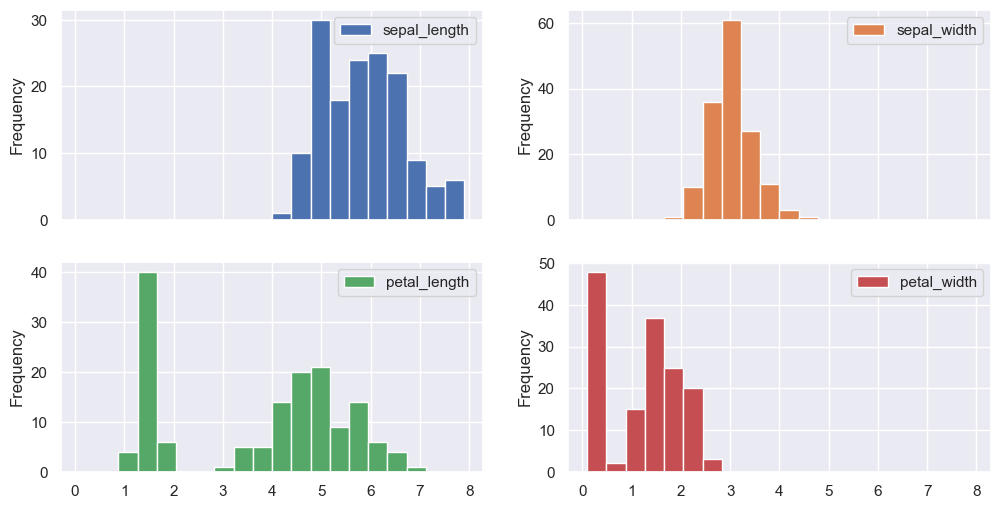

In [101]:
iris.plot.hist(subplots=True, layout=(2, 2), figsize=(12, 6), bins=20);

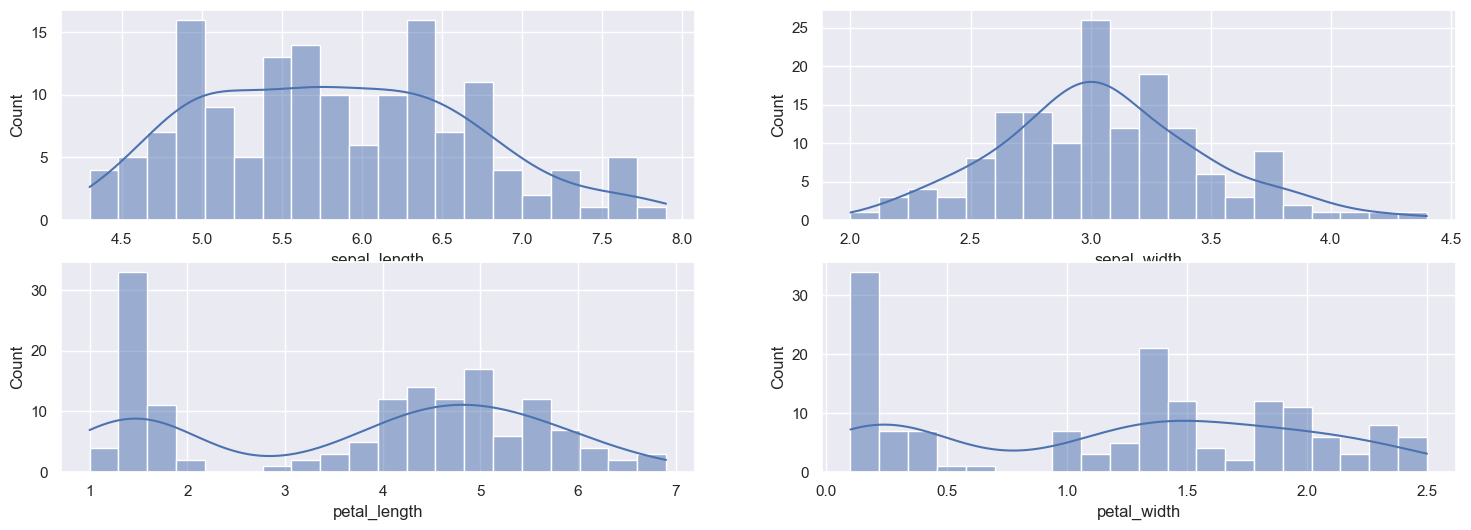

In [96]:
# Plot each feature for all species in a single plot using histogram in seaborn
fig, axes = plt.subplots(2, 2, figsize=(18, 6))
for i, feature in enumerate(['sepal_length', 'sepal_width', 'petal_length', 'petal_width']):
    sns.histplot(data=iris, x=feature, kde=True, ax=axes[i // 2, i % 2], bins=20);
    # axes[i // 2, i % 2].set_title(feature);

## Question 8

Using Pandas, make a boxplot of each petal and sepal measurement. Here is the documentation for [Pandas boxplot method](http://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html#visualization-box).

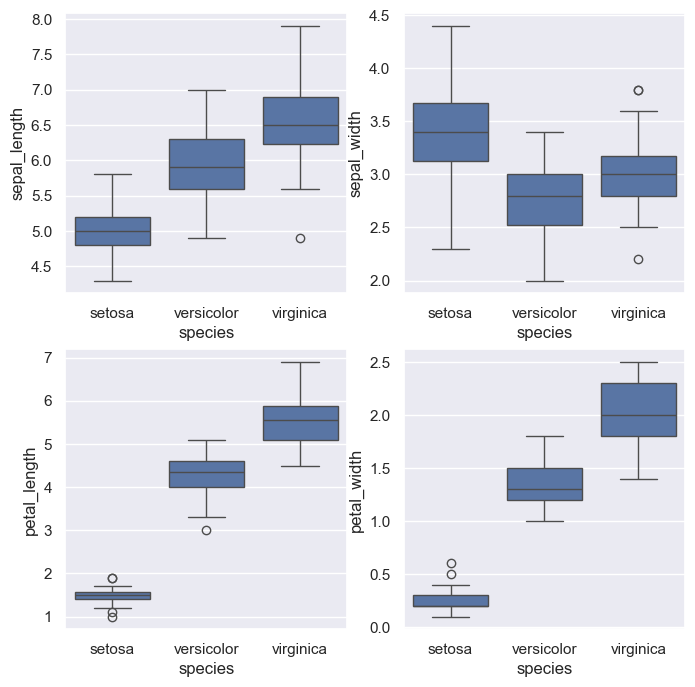

In [78]:
# Plot each feature for all species in a single plot using boxplot in seaborn
fig, axes = plt.subplots(2, 2, figsize=(8, 8))
for i, feature in enumerate(['sepal_length', 'sepal_width', 'petal_length', 'petal_width']):
    sns.boxplot(data=iris, x='species', y=feature, ax=axes[i // 2, i % 2]);

<Figure size 1200x800 with 0 Axes>

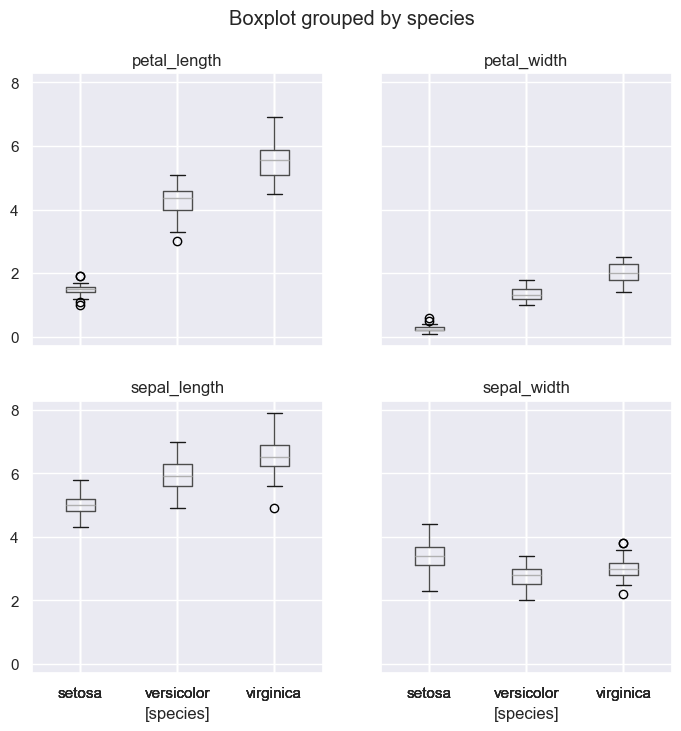

In [103]:
### BEGIN SOLUTION
# Here we have four separate plots
plt.figure(figsize=(12, 8))
iris.boxplot(by='species', figsize=(8, 8));
### END SOLUTION

## Question 9

Now make a single boxplot where the features are separated in the x-axis and species are colored with different hues. 

*Hint:* you may want to check the documentation for [Seaborn boxplots](http://seaborn.pydata.org/generated/seaborn.boxplot.html). 

Also note that Seaborn is very picky about data format--for this plot to work, the input dataframe will need to be manipulated so that each row contains a single data point (a species, a measurement type, and the measurement value). Check out Pandas [stack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.stack.html) method as a starting place.

Here is an example of a data format that will work:

|   | species | measurement  | size |
| - | ------- | ------------ | ---- |
| 0	| setosa  | sepal_length | 5.1  |
| 1	| setosa  | sepal_width  | 3.5  |

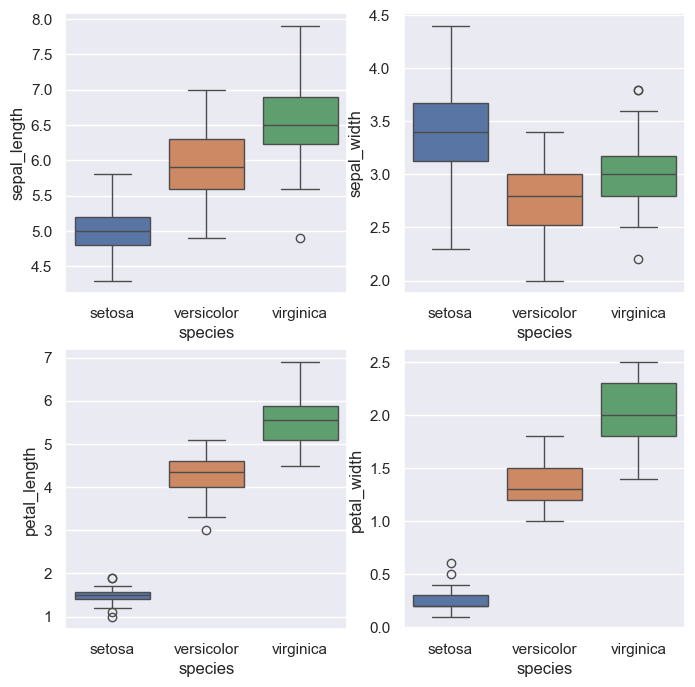

In [79]:
# Plot each feature for all species in a single plot using boxplot in seaborn
fig, axes = plt.subplots(2, 2, figsize=(8, 8))
for i, feature in enumerate(['sepal_length', 'sepal_width', 'petal_length', 'petal_width']):
    sns.boxplot(data=iris, x='species', y=feature, ax=axes[i // 2, i % 2], hue='species');

In [73]:
### BEGIN SOLUTION
# First we have to reshape the data so there is 
# only a single measurement in each column

plot_data = (iris
             .set_index('species')
             .stack()
             .to_frame()
             .reset_index()
             .rename(columns={0:'size', 'level_1':'measurement'})
            )

plot_data.head()
### END SOLUTION

,species,measurement,size
0,setosa,sepal_length,5.1
1,setosa,sepal_width,3.5
2,setosa,petal_length,1.4
3,setosa,petal_width,0.2
4,setosa,sepal_length,4.9


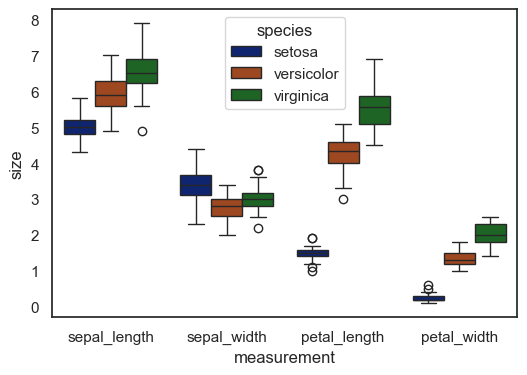

In [74]:
### BEGIN SOLUTION
# Now plot the dataframe from above using Seaborn

sns.set_style('white')
sns.set_context('notebook')
sns.set_palette('dark')

f = plt.figure(figsize=(6,4))
sns.boxplot(x='measurement', y='size', 
            hue='species', data=plot_data);
### END SOLUTION

## Question 10

Make a [pairplot](http://seaborn.pydata.org/generated/seaborn.pairplot.html) with Seaborn to examine the correlation between each of the measurements.

*Hint:* this plot may look complicated, but it is actually only a single line of code. This is the power of Seaborn and dataframe-aware plotting! See the lecture notes for reference.

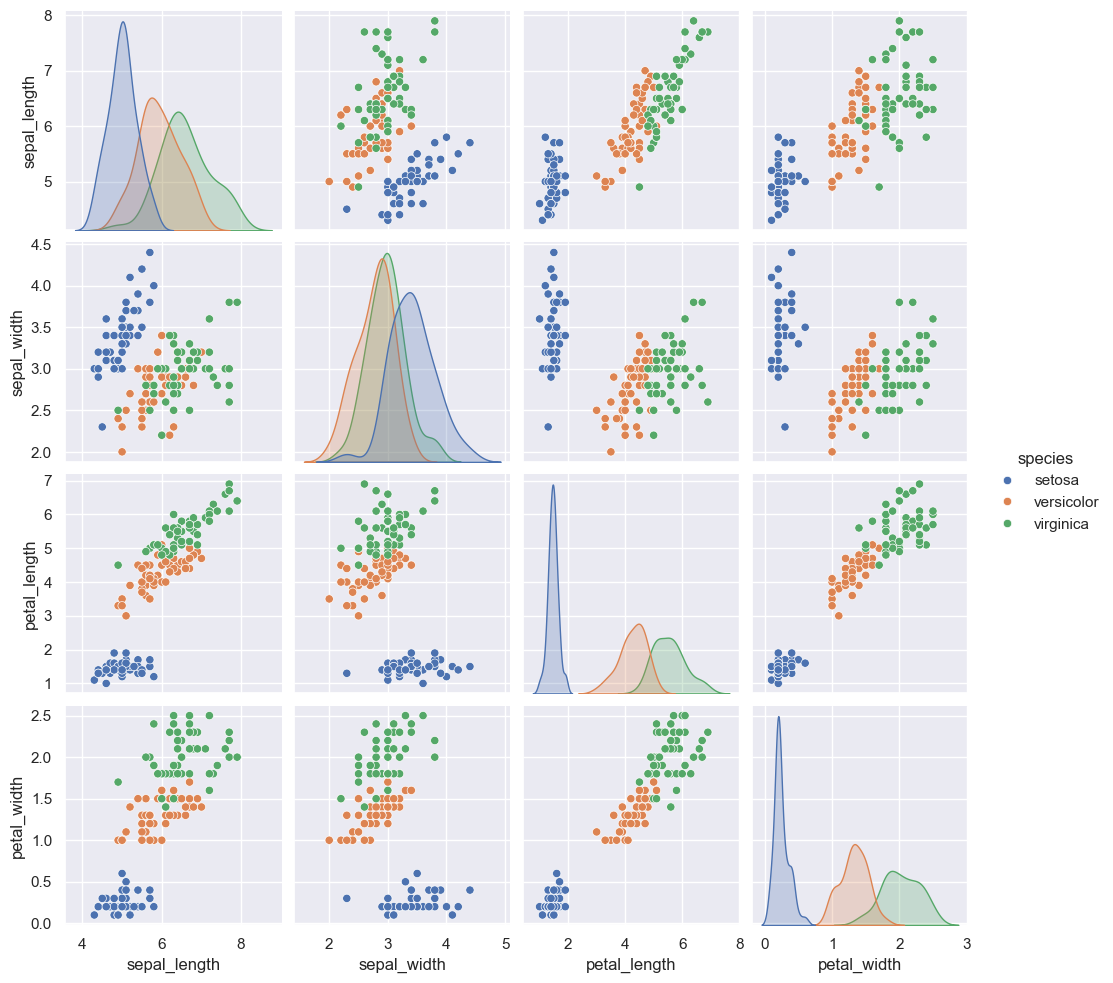

In [80]:
# Make a pairplot with Seaborn to examine the relationships between features
sns.pairplot(iris, hue='species');

In [ ]:
### BEGIN SOLUTION
sns.set_context('talk')
sns.pairplot(data, hue='species');
### END SOLUTION